In [1]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder

In [2]:
df=pd.read_csv('./dentaldata.csv')
df.head()

,Timestamp,Patient Number,Chief complaint,Nature of Pain,Severity of pain,Onset and mode of pain,Factors which worsens the pain,Is the swelling painful?,Has the swelling changed since it was first noticed? If yes how quickly?,"Does the swelling changes during normal activities such as eating, speaking, etc?",...,Is there discharge from the ulcer?,Is there a foul smell from the ulcer?,Do the ulcers interfere with daily activities,Has the ulcer changed since first noticed?,Have you had similar ulcers?,Final Diagnosis,Is there bleeding in the gums?,Is there pain in the gums,"If any tooth/teeth is/are mobile, what is the degree of mobility",Where is the pain being felt?
0,31/10/2023 08:55:03,M30,Pain,aching,Mild,lingering pain,No,No,No,No,...,No,No,No,No,No,Acute Irreversible Pulpitis,No,No,No,NaN
1,31/10/2023 09:11:12,F21,Pain,aching,Mild,The pain came suddenly,Eating,No,No,No,...,No,No,No,No,No,Food impaction,No,No,No,NaN
2,31/10/2023 09:28:50,M20,Swelling,throbbing,Moderate,lingering pain,Hot foods or drinks,No,No,No,...,No,No,No,No,No,Pulpitis with swelling,No,No,No,NaN
3,31/10/2023 09:29:47,F34,Pain,throbbing,Severe,The pain came suddenly,Hot foods or drinks,No,No,No,...,No,No,No,No,No,Acute Irreversible Pulpitis,No,No,No,NaN
4,31/10/2023 09:36:48,F5,Swelling,No,No,No,No,No,Slow,No,...,No,No,No,No,No,Periodontal abcess,No,No,No,NaN


In [3]:
df=df.drop(['Timestamp','Where is the pain being felt?'],axis=1)

In [4]:
df.isna().sum()

Patient Number                                                                         0
Chief complaint                                                                        0
Nature of Pain                                                                        70
Severity of pain                                                                      76
Onset  and mode of pain                                                               86
Factors which worsens the pain                                                        85
Is the swelling painful?                                                             501
Has the swelling changed since it was first noticed? If yes how quickly?             500
Does the swelling changes during normal activities such as eating, speaking, etc?    502
Is the ulcer painful                                                                 427
Is there bleeding from the ulcer                                                     428
Is there discharge fr

In [5]:
df=df.fillna("No")
df.isna().sum()

Patient Number                                                                       0
Chief complaint                                                                      0
Nature of Pain                                                                       0
Severity of pain                                                                     0
Onset  and mode of pain                                                              0
Factors which worsens the pain                                                       0
Is the swelling painful?                                                             0
Has the swelling changed since it was first noticed? If yes how quickly?             0
Does the swelling changes during normal activities such as eating, speaking, etc?    0
Is the ulcer painful                                                                 0
Is there bleeding from the ulcer                                                     0
Is there discharge from the ulcer?         

In [6]:
df['Gender']=(df['Patient Number'].apply(lambda x: x[0]))
df['Age']=(df['Patient Number'].apply(lambda x: x[1:]))
df=df.drop(["Patient Number"],axis=1)

In [7]:
age_group_dict = {
    '0-12': 'Child',
    '13-19': 'Teenager',
    '20-39': 'Young Adult',
    '40-59': 'Adult',
    '60-100': 'Old'
}

df['AgeGroup'] = df['Age'].apply(lambda x: next((label for age_range, label in age_group_dict.items() if int(age_range.split('-')[0]) <= int(x) <= int(age_range.split('-')[1])), None))

<Axes: xlabel='count', ylabel='Final Diagnosis'>

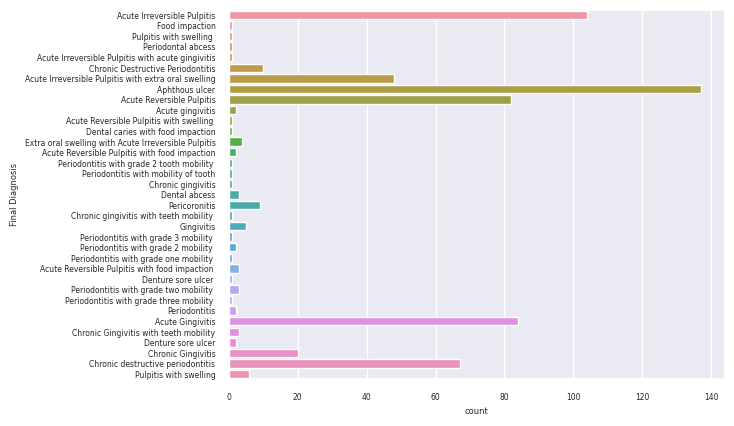

In [8]:
diagnosis=df["Final Diagnosis"]
sns.set(font_scale=0.5)
sns.countplot(y=diagnosis, label="Number of cases")

In [9]:
df['Chief complaint']=df['Chief complaint'].str.replace('Ulecer','Ulcer')
correct_values={
    'Pulpits':'Pulpitis',
    'pulpits':'Pulpitis',
    'pulpitts':'Pulpitis',
    'pulpitis':'Pulpitis',
    "Pulpitis with swelling ":"Pulpitis with swelling",
    "Gingivitis with teeth mobility ":"Gingivitis with teeth mobility",
    'Periodontitis with grade two mobility':'Chronic Destructive Periodontitis',
    'Periodontitis with grade three mobility':'Chronic Destructive Periodontitis',
    'Periodontitis with grade one mobility':'Chronic Destructive Periodontitis',
    'Periodontitis with grade 1 mobility':'Chronic Destructive Periodontitis',
    'Periodontitis with grade 2 mobility':'Chronic Destructive Periodontitis',
    'Periodontitis with grade 3 mobility':'Chronic Destructive Periodontitis',
    'Periodontitis with mobility of tooth':'Chronic Destructive Periodontitis',
    'Periodontitis with grade 2 tooth mobility':'Chronic Destructive Periodontitis',
    "Chronic Destructive Periodontitis ":"Chronic Destructive Periodontitis",
    "Chronic destructive periodontitis":"Chronic Destructive Periodontitis",
    "Acute Reversible Pulpitis with food impaction ":"Acute Reversible Pulpitis with food impaction",
    "Extra oral swelling with Acute Irreversible Pulpitis":"Acute Reversible Pulpitis with swelling ",
    "Acute Reversible Pulpitis with swelling ":"Acute Reversible Pulpitis with swelling",
    'gingivitis':'Gingivitis',
    "Acute Gingivitis":"Gingivitis",
    "Chronic Acute Gingivitis":"Gingivitis",
    "Chronic Gingivitis":"Gingivitis",
    "Gingivitis with teeth mobility ":"Gingivitis with teeth mobility",
    "Gingivitis with teeth mobility ":"Gingivitis with teeth mobility",
    "Denture sore ulcer ":"Denture sore ulcer",
}
for word, correct in correct_values.items():
    df['Final Diagnosis']=df['Final Diagnosis'].str.replace(word,correct)
df.fillna("No",inplace=True)

In [10]:
df.head()

,Chief complaint,Nature of Pain,Severity of pain,Onset and mode of pain,Factors which worsens the pain,Is the swelling painful?,Has the swelling changed since it was first noticed? If yes how quickly?,"Does the swelling changes during normal activities such as eating, speaking, etc?",Is the ulcer painful,Is there bleeding from the ulcer,...,Do the ulcers interfere with daily activities,Has the ulcer changed since first noticed?,Have you had similar ulcers?,Final Diagnosis,Is there bleeding in the gums?,Is there pain in the gums,"If any tooth/teeth is/are mobile, what is the degree of mobility",Gender,Age,AgeGroup
0,Pain,aching,Mild,lingering pain,No,No,No,No,No,No,...,No,No,No,Acute Irreversible Pulpitis,No,No,No,M,30,Young Adult
1,Pain,aching,Mild,The pain came suddenly,Eating,No,No,No,No,No,...,No,No,No,Food impaction,No,No,No,F,21,Young Adult
2,Swelling,throbbing,Moderate,lingering pain,Hot foods or drinks,No,No,No,No,No,...,No,No,No,Pulpitis with swelling,No,No,No,M,20,Young Adult
3,Pain,throbbing,Severe,The pain came suddenly,Hot foods or drinks,No,No,No,No,No,...,No,No,No,Acute Irreversible Pulpitis,No,No,No,F,34,Young Adult
4,Swelling,No,No,No,No,No,Slow,No,No,No,...,No,No,No,Periodontal abcess,No,No,No,F,5,Child


In [11]:
gender_counts=df["Gender"].value_counts()
print(gender_counts)

F    354
M    258
Name: Gender, dtype: int64


In [12]:
age_group_counts=df['AgeGroup'].value_counts()
print(age_group_counts)

Adult          189
Young Adult    143
Old            143
Child          108
Teenager        29
Name: AgeGroup, dtype: int64


In [13]:
diagnosis_counts=df['Final Diagnosis'].value_counts()
print(diagnosis_counts)
count=0
for diagnosis in diagnosis_counts.items():
    count+=1
print(count)

Aphthous ulcer                                          137
Gingivitis                                              112
Acute Irreversible Pulpitis                             104
Chronic Destructive Periodontitis                        87
Acute Reversible Pulpitis                                82
Acute Irreversible Pulpitis with extra oral swelling     48
Pericoronitis                                             9
Pulpitis with swelling                                    7
Acute Reversible Pulpitis with swelling                   5
Acute Reversible Pulpitis with food impaction             5
Dental abcess                                             3
Denture sore ulcer                                        3
Gingivitis with teeth mobility                            3
Periodontitis                                             2
Periodontal abcess                                        1
Acute Irreversible Pulpitis with acute Gingivitis         1
Food impaction                          

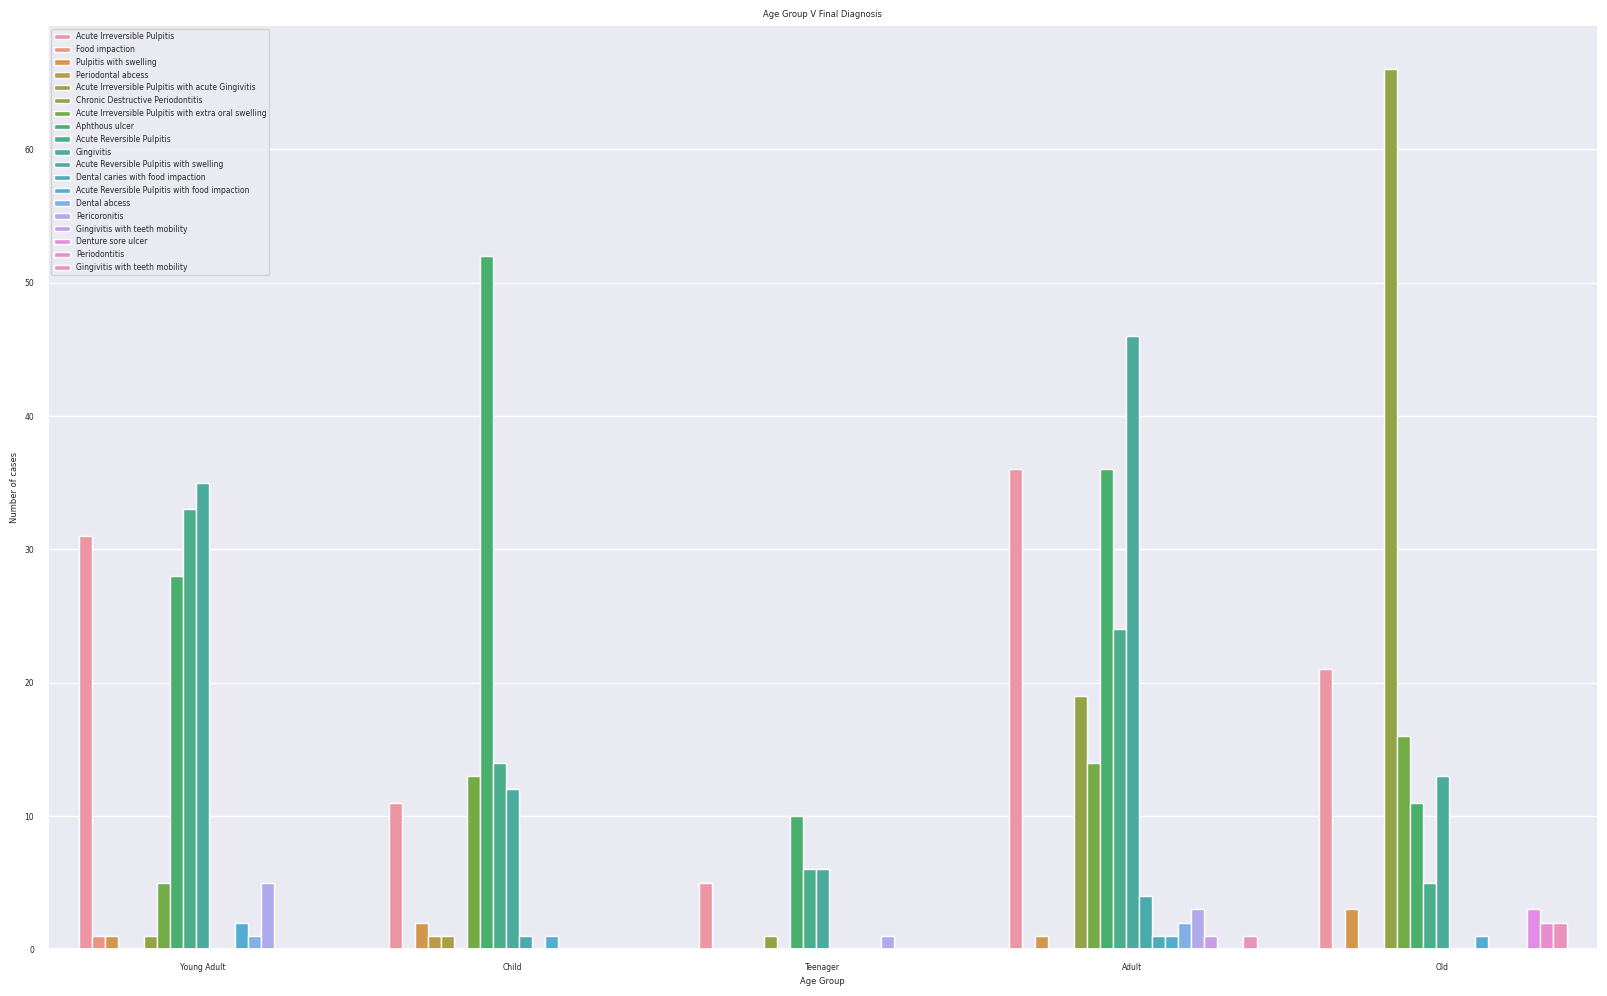

In [14]:
sns.set(font_scale=0.5)
plt.figure(figsize=(20,12))

sns.countplot(x="AgeGroup", hue="Final Diagnosis", data=df)
plt.title("Age Group V Final Diagnosis")
plt.xlabel("Age Group")
plt.ylabel("Number of cases")

plt.legend(loc='upper left')

plt.show()

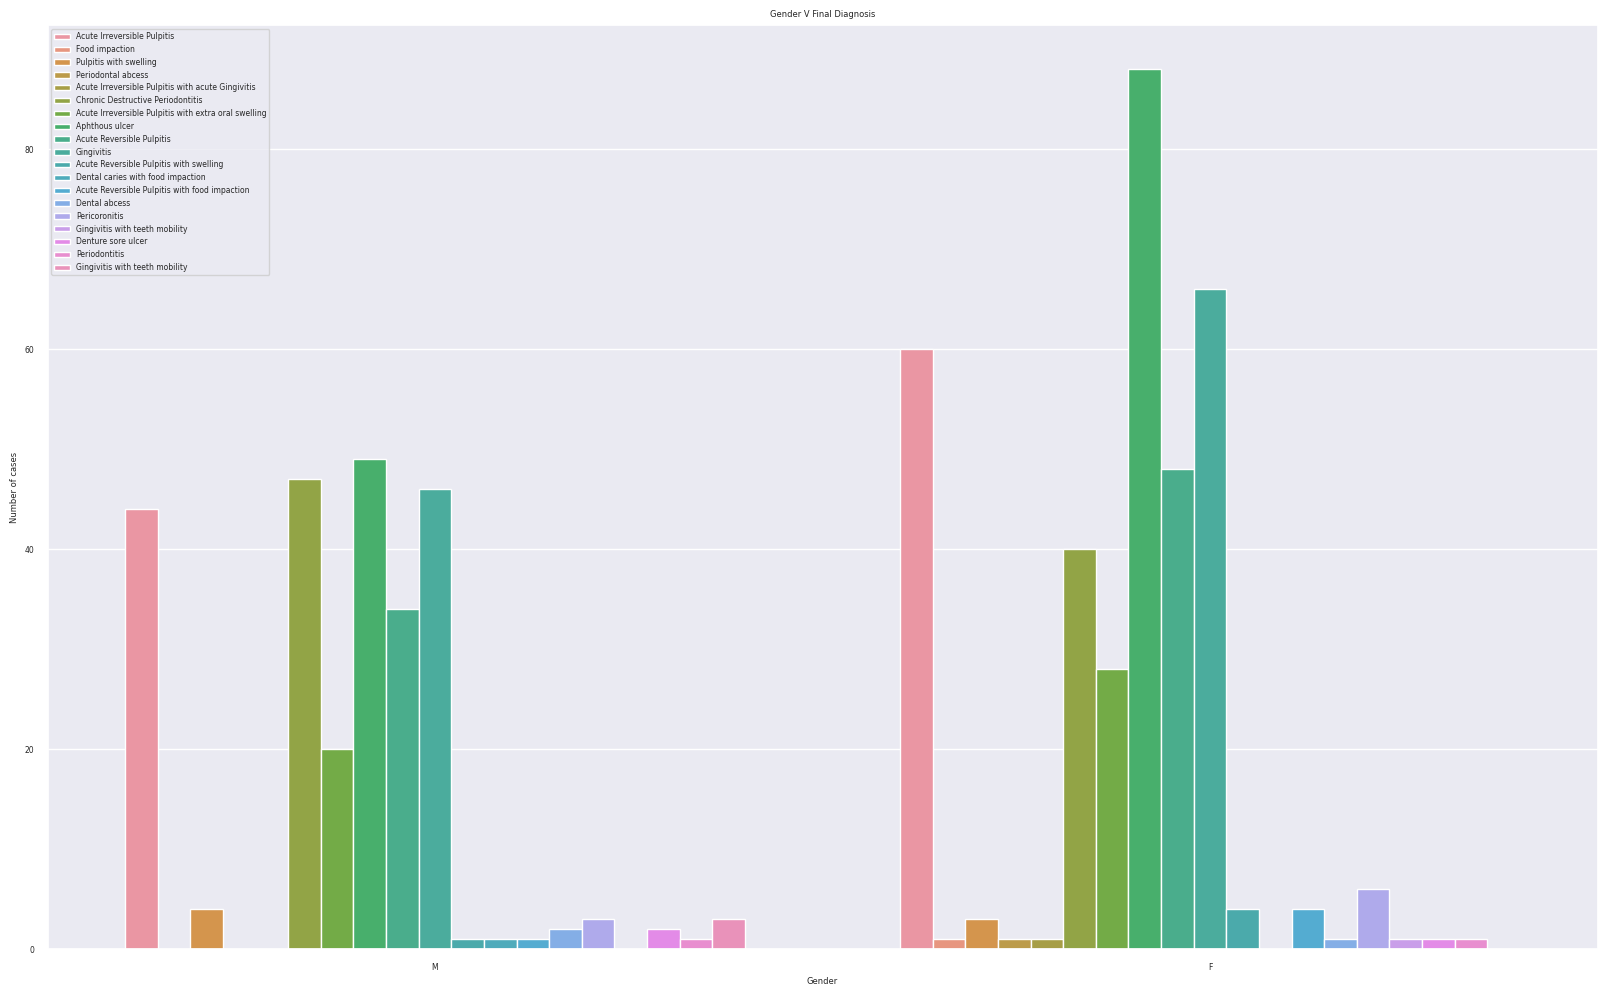

In [15]:
sns.set(font_scale=0.5)
plt.figure(figsize=(20,12))

sns.countplot(x="Gender", hue="Final Diagnosis", data=df)
plt.title("Gender V Final Diagnosis")
plt.xlabel("Gender")
plt.ylabel("Number of cases")

plt.legend(loc='upper left')

plt.show()

In [16]:
from sklearn.preprocessing import OrdinalEncoder
import json

encoder = OrdinalEncoder(dtype=float)
df_encoded = pd.DataFrame(encoder.fit_transform(df), columns=df.columns)

encoding_scheme = {}

for column_name, categories in zip(df.columns, encoder.categories_):
    encoding_scheme[column_name] = dict(zip(categories, range(len(categories))))

with open('encoding_scheme.json', 'w') as file:
    json.dump(encoding_scheme, file)
with open('encoding_scheme.txt', 'w') as file:
    file.write(str(encoding_scheme))


In [17]:
df_encoded=df_encoded.drop(["Age"],axis=1)
df_encoded.head()

,Chief complaint,Nature of Pain,Severity of pain,Onset and mode of pain,Factors which worsens the pain,Is the swelling painful?,Has the swelling changed since it was first noticed? If yes how quickly?,"Does the swelling changes during normal activities such as eating, speaking, etc?",Is the ulcer painful,Is there bleeding from the ulcer,...,Is there a foul smell from the ulcer?,Do the ulcers interfere with daily activities,Has the ulcer changed since first noticed?,Have you had similar ulcers?,Final Diagnosis,Is there bleeding in the gums?,Is there pain in the gums,"If any tooth/teeth is/are mobile, what is the degree of mobility",Gender,AgeGroup
0,1.0,1.0,1.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,4.0
1,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,0.0,0.0,3.0,0.0,4.0
2,2.0,4.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,18.0,0.0,0.0,3.0,1.0,4.0
3,1.0,4.0,4.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,4.0
4,2.0,0.0,3.0,0.0,4.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,16.0,0.0,0.0,3.0,0.0,1.0


<Axes: xlabel='count', ylabel='Final Diagnosis'>

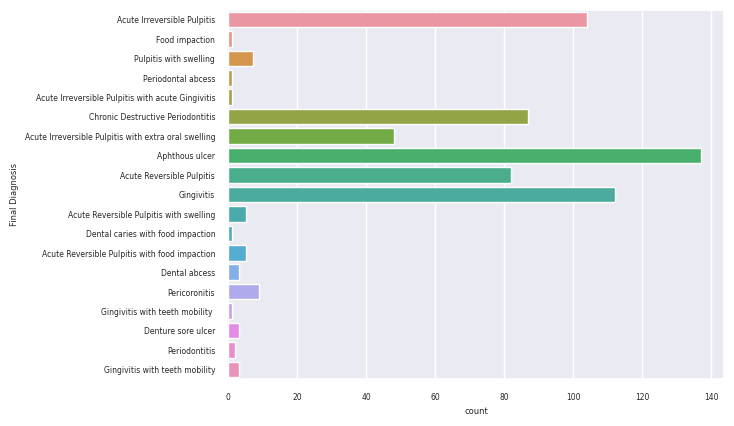

In [18]:
diagnosis=df["Final Diagnosis"]
sns.set(font_scale=0.5)
sns.countplot(y=diagnosis, label="Number of cases")

In [19]:
df_encoded_diagnosis=df_encoded["Final Diagnosis"]
df_encoded=df_encoded.drop(["Final Diagnosis"],axis=1)
df_encoded["Final Diagnosis"]=df_encoded_diagnosis
df_encoded.head()

,Chief complaint,Nature of Pain,Severity of pain,Onset and mode of pain,Factors which worsens the pain,Is the swelling painful?,Has the swelling changed since it was first noticed? If yes how quickly?,"Does the swelling changes during normal activities such as eating, speaking, etc?",Is the ulcer painful,Is there bleeding from the ulcer,...,Is there a foul smell from the ulcer?,Do the ulcers interfere with daily activities,Has the ulcer changed since first noticed?,Have you had similar ulcers?,Is there bleeding in the gums?,Is there pain in the gums,"If any tooth/teeth is/are mobile, what is the degree of mobility",Gender,AgeGroup,Final Diagnosis
0,1.0,1.0,1.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,4.0,0.0
1,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,4.0,11.0
2,2.0,4.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,4.0,18.0
3,1.0,4.0,4.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,4.0,0.0
4,2.0,0.0,3.0,0.0,4.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,16.0


In [20]:
df_encoded_correlation=df_encoded.corr()

/home/the_architect/.local/lib/python3.10/site-packages/seaborn/matrix.py:256: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


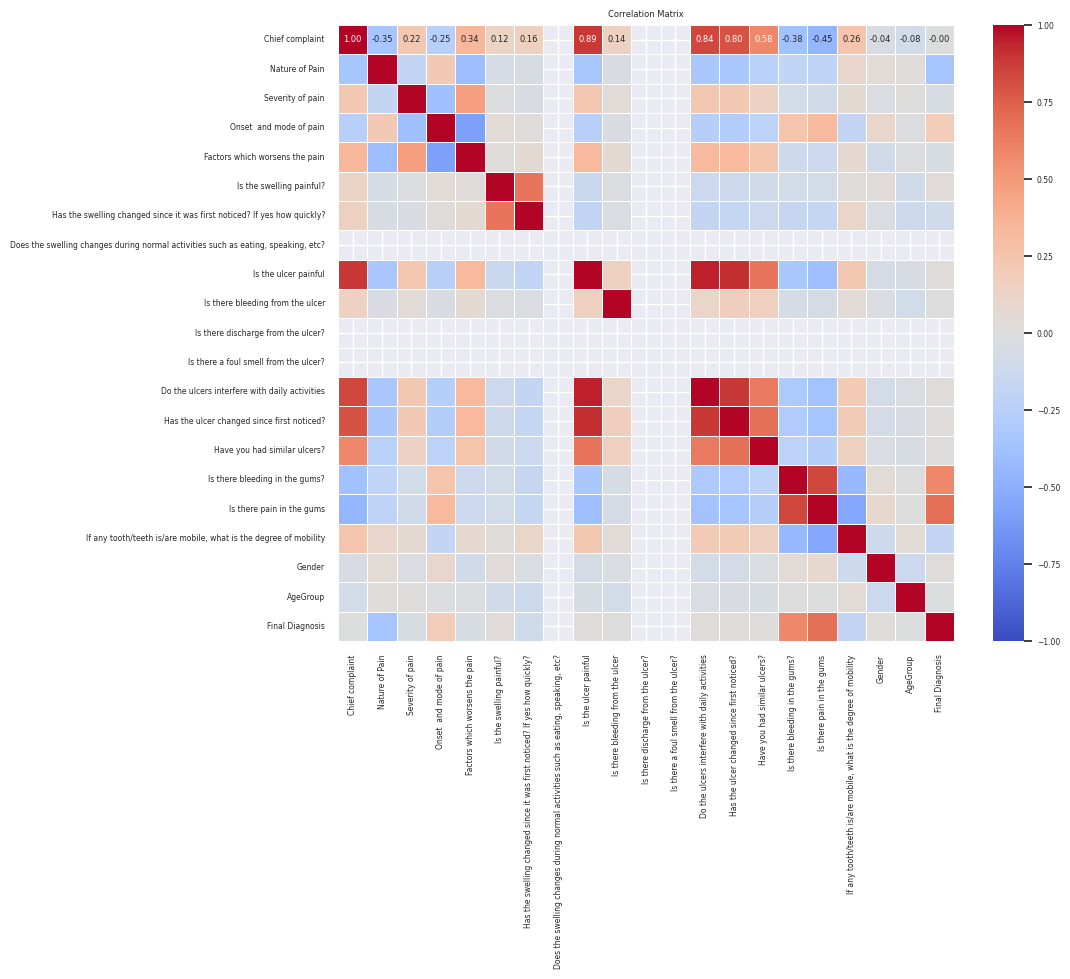

In [24]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_encoded_correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f", linewidths=.5, square=True)
plt.title("Correlation Matrix")
plt.show()


In [25]:
df_encoded['Is there discharge from the ulcer?'].unique()

array([0.])

In [27]:
df_encoded=df_encoded.drop(['Does the swelling changes during normal activities such as eating, speaking, etc?',"Is there a foul smell from the ulcer?","Is there discharge from the ulcer?"],axis=1)

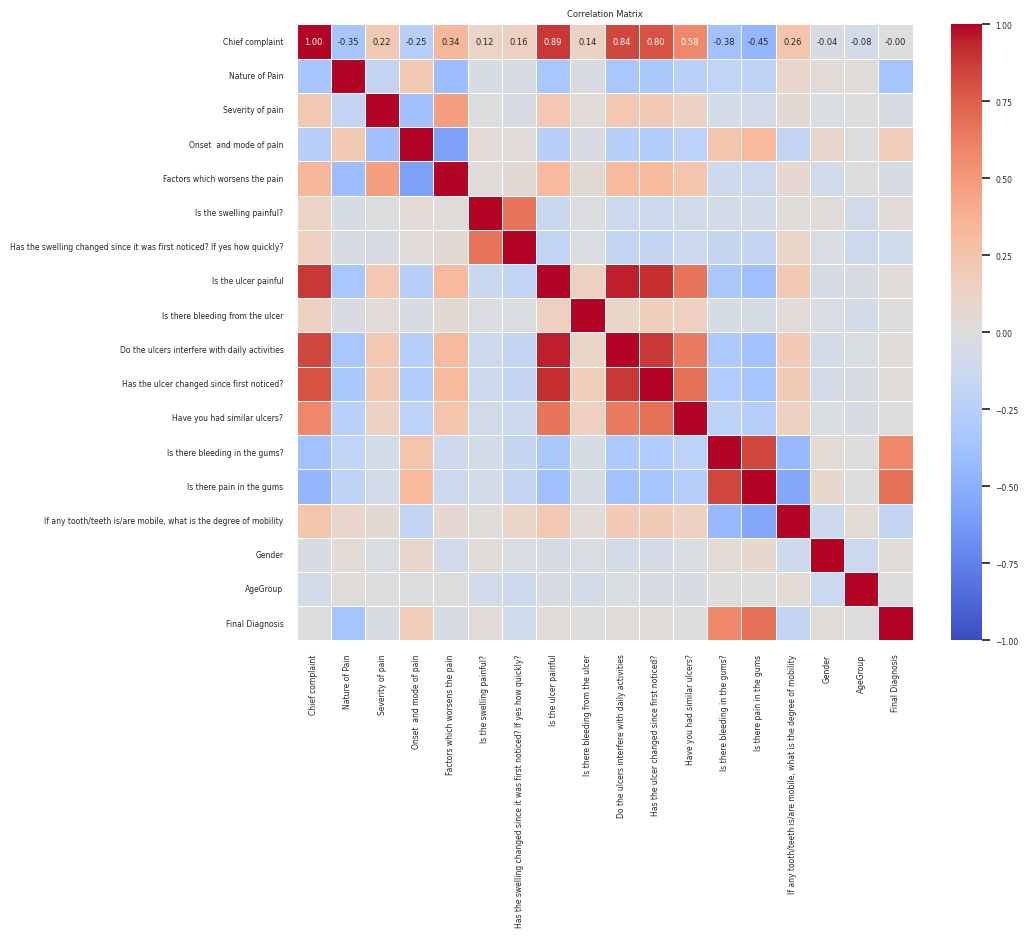

In [30]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f", linewidths=.5, square=True)
plt.title("Correlation Matrix")
plt.show()


In [21]:
df['Final Diagnosis'].value_counts()/float(len(df))

Aphthous ulcer                                          0.223856
Gingivitis                                              0.183007
Acute Irreversible Pulpitis                             0.169935
Chronic Destructive Periodontitis                       0.142157
Acute Reversible Pulpitis                               0.133987
Acute Irreversible Pulpitis with extra oral swelling    0.078431
Pericoronitis                                           0.014706
Pulpitis with swelling                                  0.011438
Acute Reversible Pulpitis with swelling                 0.008170
Acute Reversible Pulpitis with food impaction           0.008170
Dental abcess                                           0.004902
Denture sore ulcer                                      0.004902
Gingivitis with teeth mobility                          0.004902
Periodontitis                                           0.003268
Periodontal abcess                                      0.001634
Acute Irreversible Pulpit

In [22]:
df_encoded['Final Diagnosis'].value_counts()/float(len(df))

6.0     0.223856
12.0    0.183007
0.0     0.169935
7.0     0.142157
3.0     0.133987
2.0     0.078431
15.0    0.014706
18.0    0.011438
5.0     0.008170
4.0     0.008170
8.0     0.004902
10.0    0.004902
13.0    0.004902
17.0    0.003268
16.0    0.001634
1.0     0.001634
11.0    0.001634
9.0     0.001634
14.0    0.001634
Name: Final Diagnosis, dtype: float64

In [23]:
X=df_encoded.drop(['Final Diagnosis'],axis=1)
y=df_encoded['Final Diagnosis']

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [25]:
X_train.shape, X_test.shape

((489, 20), (123, 20))

In [26]:
X_train.describe()

,Chief complaint,Nature of Pain,Severity of pain,Onset and mode of pain,Factors which worsens the pain,Is the swelling painful?,Has the swelling changed since it was first noticed? If yes how quickly?,"Does the swelling changes during normal activities such as eating, speaking, etc?",Is the ulcer painful,Is there bleeding from the ulcer,Is there discharge from the ulcer?,Is there a foul smell from the ulcer?,Do the ulcers interfere with daily activities,Has the ulcer changed since first noticed?,Have you had similar ulcers?,Is there bleeding in the gums?,Is there pain in the gums,"If any tooth/teeth is/are mobile, what is the degree of mobility",Gender,AgeGroup
count,489.000000,489.000000,489.00000,489.000000,489.000000,489.000000,489.000000,489.0,489.000000,489.000000,489.0,489.0,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000
mean,1.582822,2.204499,2.08998,1.325153,1.695297,0.059305,0.198364,0.0,0.237219,0.008180,0.0,0.0,0.214724,0.204499,0.128834,0.280164,0.355828,2.695297,0.433538,1.701431
std,0.852787,1.491472,0.88942,0.745616,1.295958,0.236436,0.593266,0.0,0.425813,0.090165,0.0,0.0,0.411051,0.403748,0.335360,0.449539,0.479254,0.746027,0.496071,1.508452
min,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.00000,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000
50%,1.000000,2.000000,2.00000,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,2.000000
75%,2.000000,4.000000,2.00000,2.000000,2.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,1.000000,1.000000,3.000000,1.000000,3.000000
max,3.000000,4.000000,4.00000,2.000000,4.000000,1.000000,2.000000,0.0,1.000000,1.000000,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,4.000000


In [27]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score

svc=SVC()

svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)

print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print('Model F1 score with default hyperparameters: {0:0.4f}'. format(f1_score(y_test, y_pred,average='macro')))
print('Model Precision score with default hyperparameters: {0:0.4f}'. format(precision_score(y_test, y_pred,average='macro',zero_division=1.0)))
print('Model Recall score with default hyperparameters: {0:0.4f}'. format(recall_score(y_test, y_pred,average='macro')))

Model accuracy score with default hyperparameters: 0.9024
Model F1 score with default hyperparameters: 0.5043
Model Precision score with default hyperparameters: 0.9425
Model Recall score with default hyperparameters: 0.5257


In [28]:
print('Training set score: {:.4f}'.format(svc.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(svc.score(X_test, y_test)))

Training set score: 0.9141
Test set score: 0.9024


In [29]:
linear_svc=SVC(kernel='poly',C=100.0)

linear_svc.fit(X_train,y_train)
y_pred=linear_svc.predict(X_test)

print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print('Model F1 score with default hyperparameters: {0:0.4f}'. format(f1_score(y_test, y_pred,average='macro')))
print('Model Precision score with default hyperparameters: {0:0.4f}'. format(precision_score(y_test, y_pred,average='macro',zero_division=1.0)))
print('Model Recall score with default hyperparameters: {0:0.4f}'. format(recall_score(y_test, y_pred,average='macro',zero_division=1.0)))

Model accuracy score with default hyperparameters: 0.8780
Model F1 score with default hyperparameters: 0.5274
Model Precision score with default hyperparameters: 0.6974
Model Recall score with default hyperparameters: 0.6119


In [30]:
from sklearn.neighbors import KNeighborsClassifier

knn_model=KNeighborsClassifier()

knn_model.fit(X_train,y_train)
y_pred=knn_model.predict(X_test)

print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print('Model F1 score with default hyperparameters: {0:0.4f}'. format(f1_score(y_test, y_pred,average='macro')))
print('Model Precision score with default hyperparameters: {0:0.4f}'. format(precision_score(y_test, y_pred,average='macro',zero_division=1.0)))
print('Model Recall score with default hyperparameters: {0:0.4f}'. format(recall_score(y_test, y_pred,average='macro',zero_division=1.0)))

Model accuracy score with default hyperparameters: 0.8780
Model F1 score with default hyperparameters: 0.5065
Model Precision score with default hyperparameters: 0.8554
Model Recall score with default hyperparameters: 0.5919
